In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('/home/babs/Documents/DIFACQUIM/PPI_ML'))

In [2]:
import phase1


In [3]:
from phase1.support_functions.df_management import get_data, get_random_smiles, get_positive_records, filter_positive_bits, filter_negative_bits
from phase1.support_functions.draw_molecules import get_ECFP4_bits, get_ECFP6_bits, draw_one_fragment

In [4]:
from phase1.support_functions.df_management import *

In [7]:
coeff = get_coefficients("SVM17_+_-std.csv")
coeff = coeff.Descriptors.to_list()
coeff[:5]

[1390, 935, 1160, 202, 160]

In [8]:
data = get_data("dataset_ecfp6.csv")
print(data.head(2))

   ipp_id chembl_id                                             SMILES  \
0     4.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br   
1     7.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   

  library  PPI family  PPI    0    1    2    3  ...  2038  2039  2040  2041  \
0     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
1     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   

   2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 2054 columns]


/home/babs/.pyenv/versions/miniconda3-3.8-4.9.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [9]:
Amox = data[data["chembl_id"]=="Amoxicillin"].SMILES.iloc[0]

In [10]:
bits_ = [207, 1223, 451]
positives_1 = filter_positive_bits(bits_, data)
print(f"molecules : {positives_1.shape}")
print(positives_1.iloc[0][["ipp_id", "SMILES"]])

molecules : (1, 2054)
ipp_id                                                  NaN
SMILES    CCN(CC)CCN1C2=C(C=C(Cl)C=C2)C(=NCC1=O)C1=CC=CC...
Name: 2779, dtype: object


In [11]:
positive_molecule = positives_1.SMILES.iloc[0] 
positive_molecule

'CCN(CC)CCN1C2=C(C=C(Cl)C=C2)C(=NCC1=O)C1=CC=CC=C1F'

In [12]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

# filter negatives
### asegurar que si son negativos en la molecula ejemplo


In [14]:
# print bits negativos
bits_

[207, 1223, 451]

In [17]:
data[
    (data["chembl_id"] == "Amoxicillin") &
    (data["207"] == 0.0) &
    (data["1223"] == 0.0) &
    (data["451"] == 0.0)
]

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
3121,NaN,Amoxicillin,[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)[C@...,FDA,NaN,No,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data[data["chembl_id"]=="Amoxicillin"][[str(i) for i in bits_]]

,207,1223,451
3121,0.0,0.0,0.0


In [22]:
data.head(2)

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,4.0,NaN,OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
desired_bits = common_bits(coeff, get_ECFP6_bits(positive_molecule))
desired_bits

[935, 843, 451, 1223, 207]

In [33]:
#set manually
desired_bits = (935, 451, 1223, 207)

# Draw

In [38]:
drug_name = "Amox"

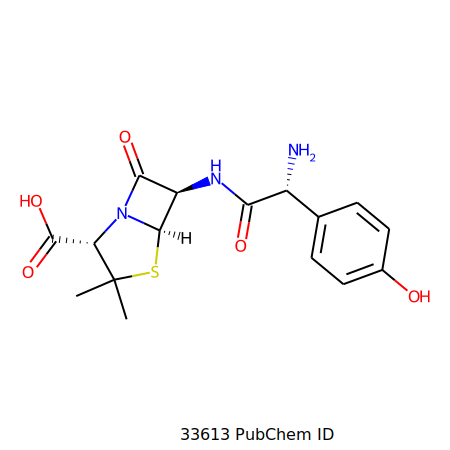

In [39]:
from rdkit import Chem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles(Amox)
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(450, 450)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# svg to text
s = drawer.GetDrawingText()
s = s.replace('svg:','')

# use svgutils to add text to svg
import svgutils.transform as sg
fig = sg.fromstring(s)
label = sg.TextElement(180, 440, 
                       "33613 PubChem ID", size=16, 
                      )
fig.append(label)
root = "/home/babs/Documents/DIFACQUIM/PPI_ML/phase1/driver_code/chemical_structures/"
fig.save(f"{root}{drug_name}.svg")
SVG(fig.to_str())

In [40]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
positive_mol = Chem.MolFromSmiles(positive_molecule)
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        positive_mol, radius=3, bitInfo=bi)

### Vamos a dibujar los fragmentos a partir de una molecula que si los posea y los comparamos con la que no 

In [41]:
#Visualizacion con filtro
tpls =[(positive_mol,x,bi) for x in fp.GetOnBits() if x in desired_bits]
# print(tpls)


drawOptions = Draw.rdMolDraw2D.MolDrawOptions()
drawer = Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits() if x in desired_bits ], 
                             #useSVG=True,
                             subImgSize=(450, 450),
                             drawOptions = drawOptions,
                            )

In [42]:
drawer.save(f"{root}Amox_fragments.jpg")

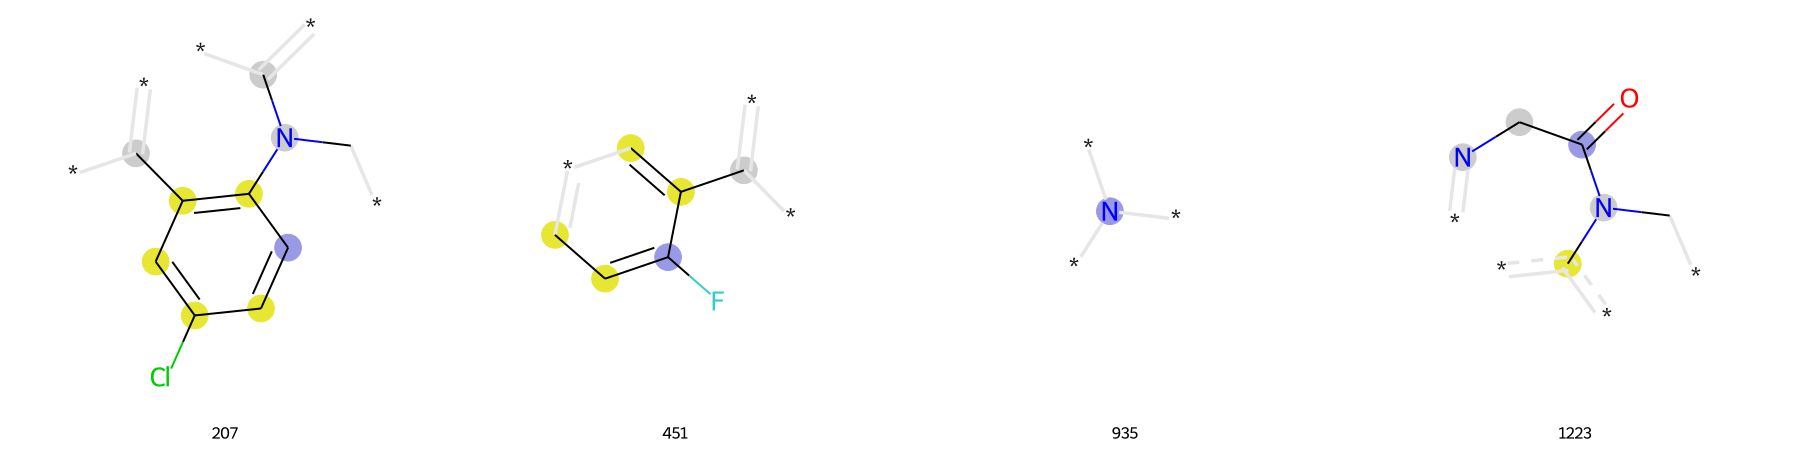

In [43]:
drawer

In [45]:
from PIL import Image
#Read the two images
#image1 = mol_
image1 = Image.open(f'{root}{drug_name}.jpg')
image1.show()
image2 = Image.open(f'{root}{drug_name}_fragments.jpg')
#image2.show()
#resize, first image
image1 = image1.resize((450, 450))
#image2 = image2.resize((450, 450))
image1_size = image1.size
image2_size = image2.size
new_image = Image.new('RGB',(5*image1_size[0], image1_size[1]), (450, 450, 450))
new_image.paste(image1,(0,0))
new_image.paste(image2,(image1_size[0],0))
new_image.save(f"{root}id{drug_name}_merged.jpg","JPEG")
new_image.show()